In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler


In [95]:
data = pd.read_csv('/Users/mac/Desktop/creditcard.csv')


In [96]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Dataset Description

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Class Distribution

In [5]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

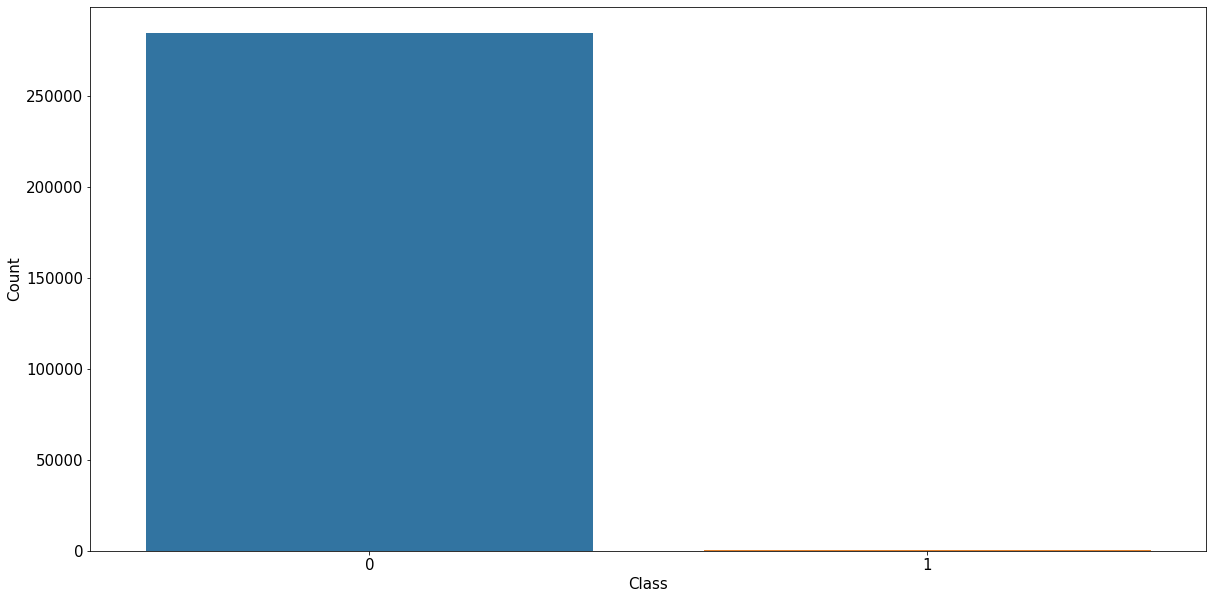

In [6]:
plt.figure(figsize=(20,10))
sn.countplot(x="Class", data=data)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

# Pre-processing

### Null Values

In [7]:
## Finding null values

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values the deal with in this dataset.

### Duplicates

In [97]:
## Finding and removing duplicates

data.duplicated().sum()

1081

In [98]:
data.drop_duplicates(inplace=True)

In [99]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

After finding and deleting the duplicate rows in the dataset, we notice a difference of {0: -1062, 1: -19}

### Normalization and Scaling

In [100]:
rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [101]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.667362,-0.995267


# Data Split

In [102]:
# Labels are the values we want to predict
labels = np.array(data['Class'])
# Remove the labels from the features
# axis 1 refers to the columns
features= data.drop('Class', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [103]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, 
                               labels, 
                               stratify = labels,
                               test_size = 0.34, 
                               random_state = 42)

In [104]:
#Looking at the shape of the data
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (187259, 30)
Training Labels Shape: (187259,)
Testing Features Shape: (96467, 30)
Testing Labels Shape: (96467,)


# Rebalancing the Training Set with SMOTE

We chose to use a SMOTE oversampler for the minority class, and a RandomUndersampler for the majority class, with ratios 0.4 and 0.9 respectively.

!! Please run the Data Split section before this one !!

In [105]:
counter = Counter(train_labels)
print("Count of labels before oversampling and undersampling:", counter)


Count of labels before oversampling and undersampling: Counter({0: 186947, 1: 312})


In [106]:
oversample = SMOTE(sampling_strategy=0.4)
undersample = RandomUnderSampler(sampling_strategy=0.9)
oversampled_train_features, oversampled_train_labels = oversample.fit_resample(train_features, train_labels)
rebalanced_features, rebalanced_labels = undersample.fit_resample(oversampled_train_features, oversampled_train_labels)


Count of labels after oversampling and undersampling: Counter({0: 83086, 1: 74778})


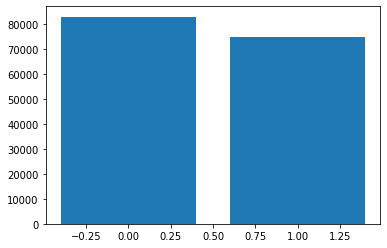

In [107]:
counter = Counter(rebalanced_labels)
print("Count of labels after oversampling and undersampling:", counter)
plt.bar(counter.keys(), counter.values())
plt.show()


# Feature Selection

### Correlation Matrix

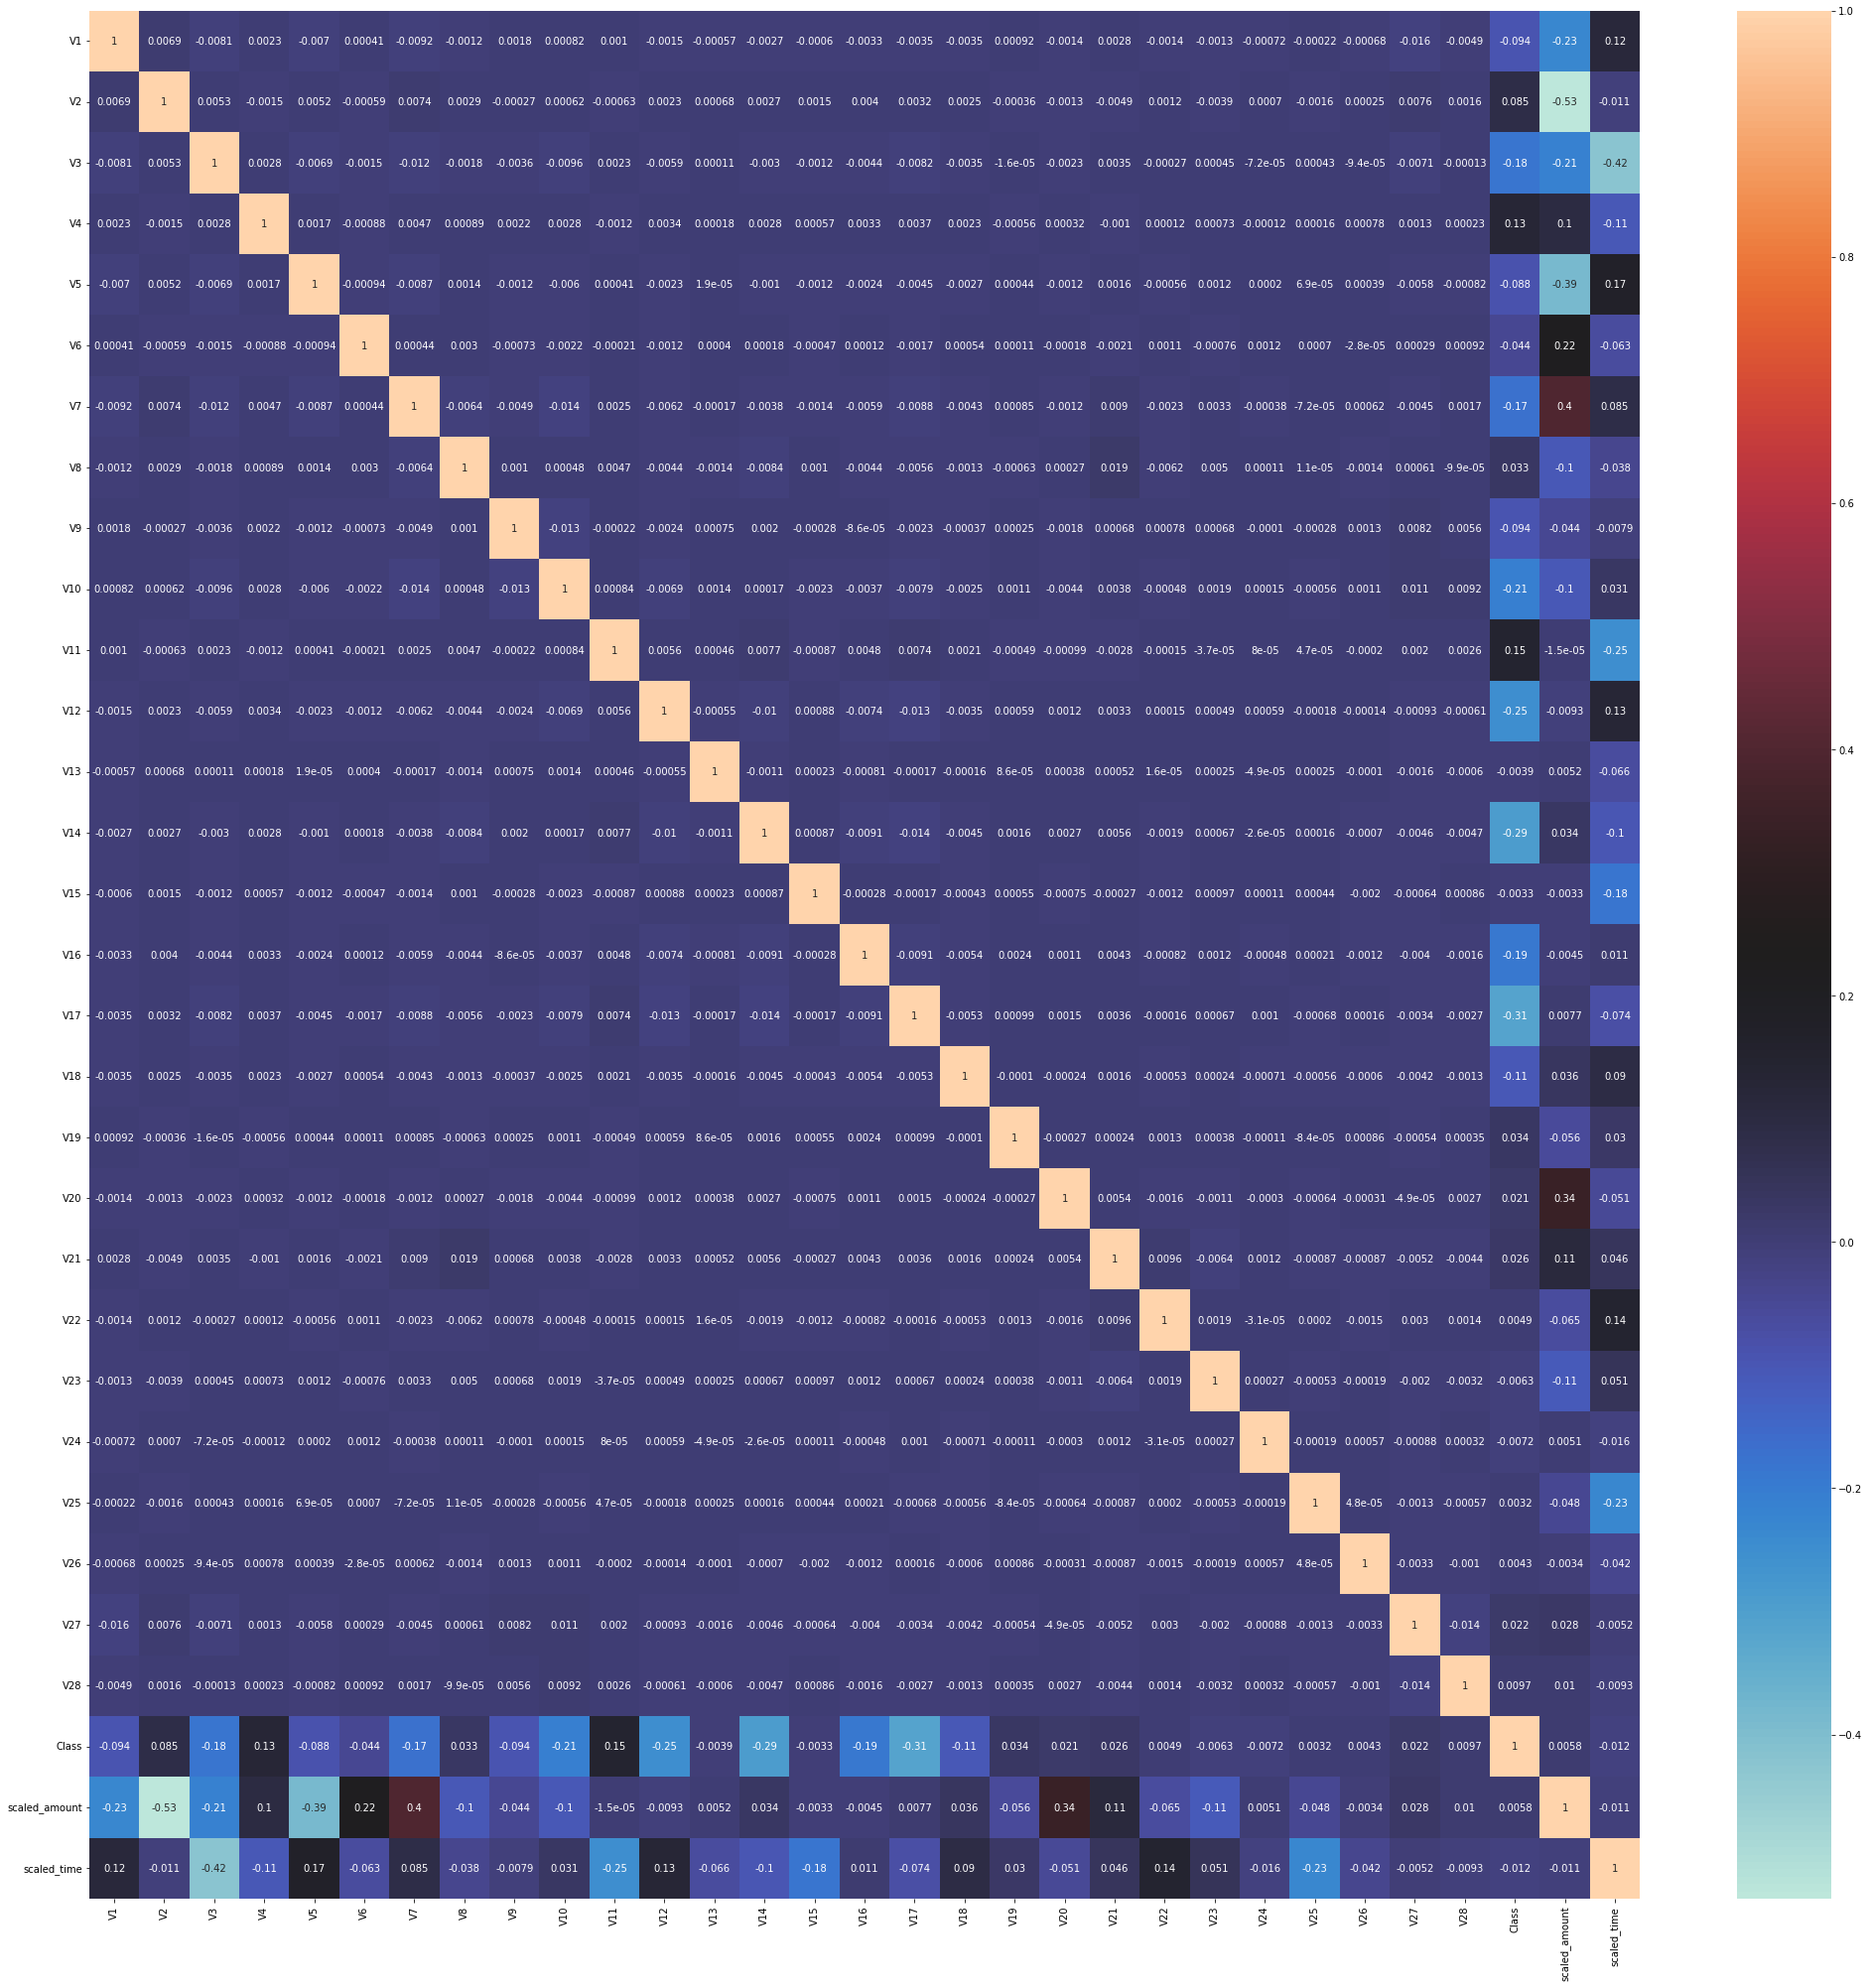

In [27]:
plt.figure(figsize = (35, 35))
sn.heatmap(data.corr(), annot=True, cmap = 'icefire')
plt.show()

### Plots

For a preliminary study of the features in the dataset, we can plot certain transactions with respect to the known (untransformed) features to see if there are noticable patterns.

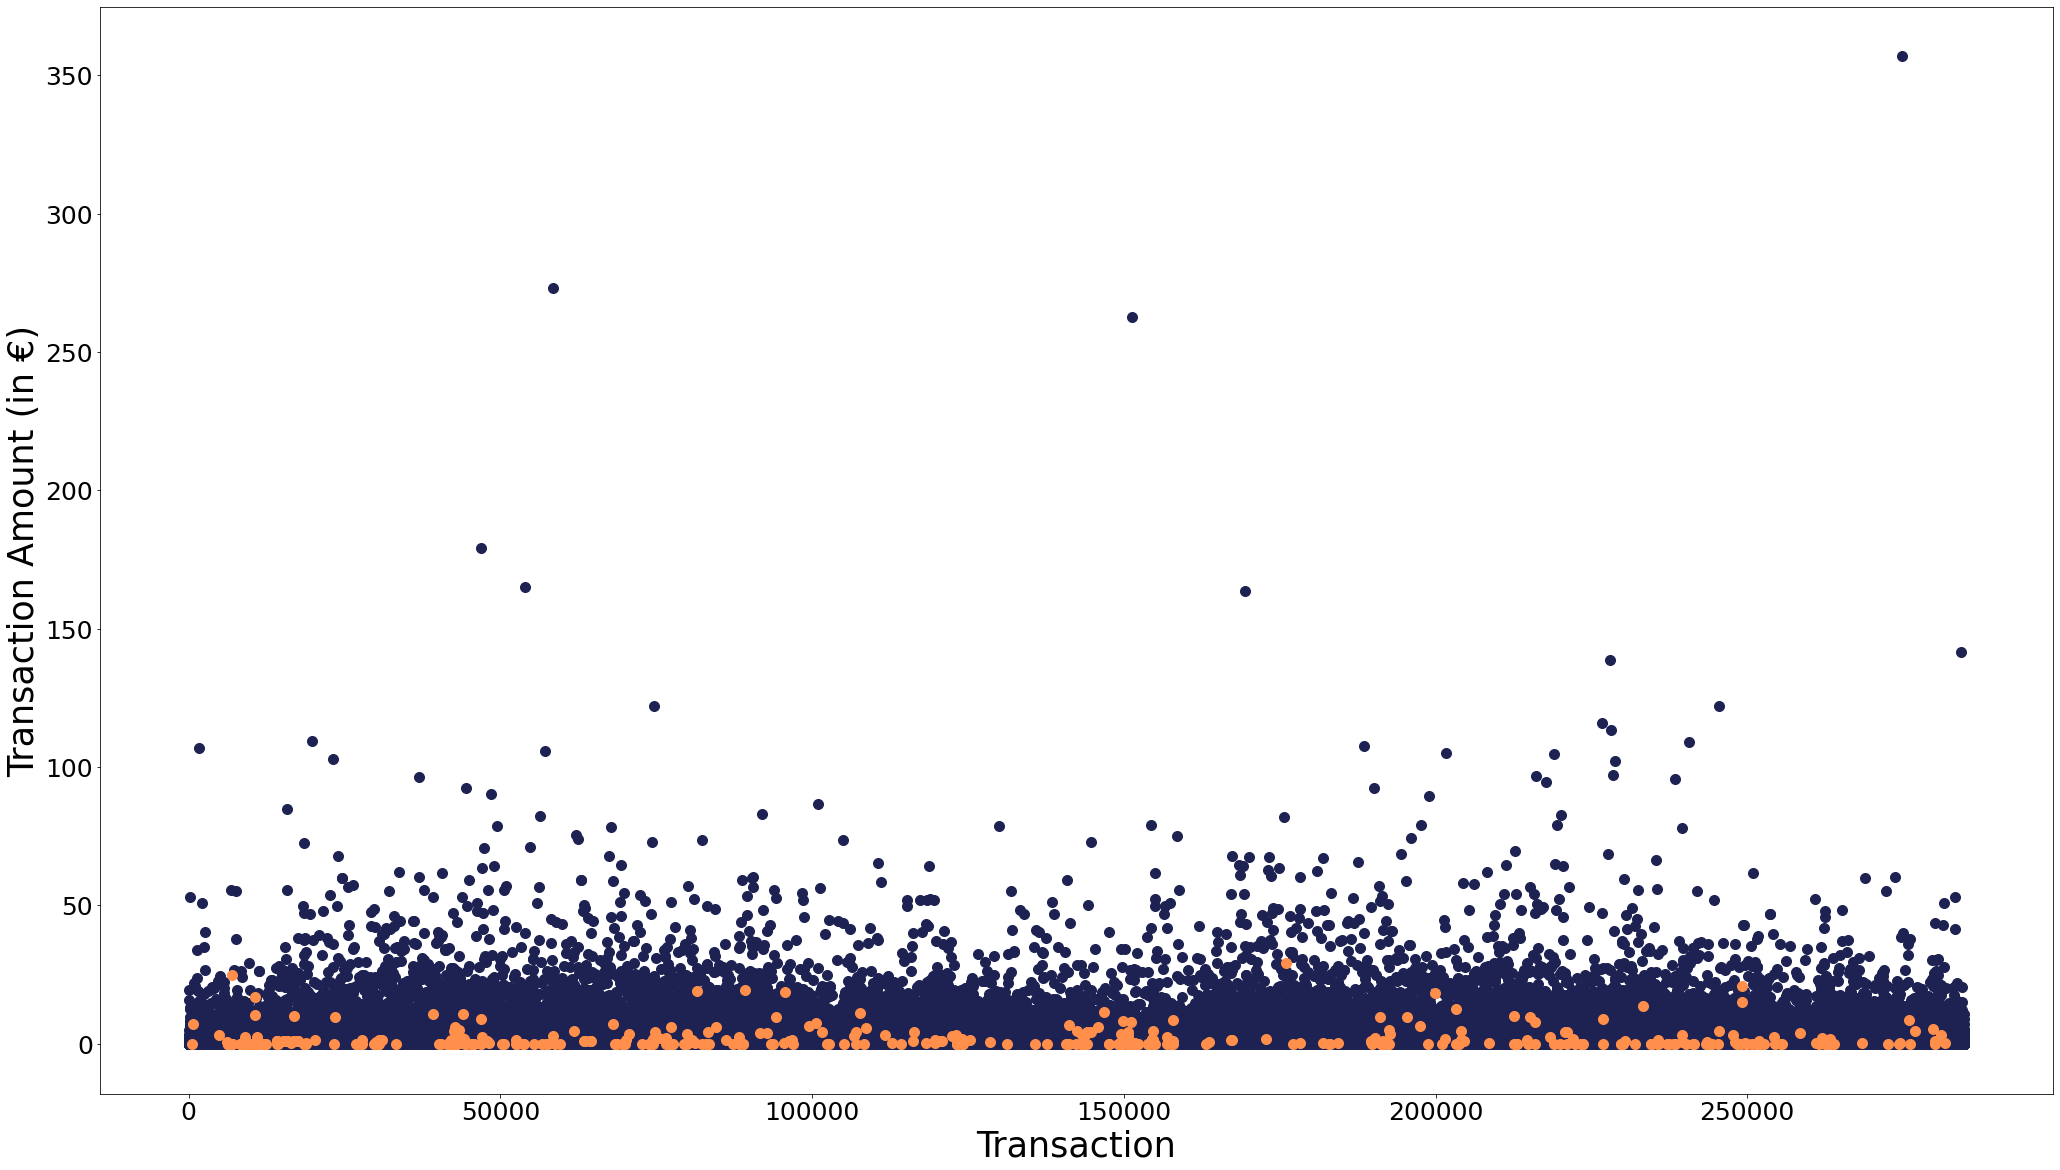

In [29]:
## Transaction class with respect to monetary amount
neg = data[data.Class==0]
pos = data[data.Class==1]

plt.figure(figsize= (35,20))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel('Transaction Amount (in €)', fontsize=35)
plt.xlabel('Transaction', fontsize=35)

plt.scatter(pos.index, pos['scaled_amount'], s= 100, zorder=2, color= '#ff8f4a')
plt.scatter(neg.index, neg['scaled_amount'], s=100, zorder=1, color = '#1e2252')
# fig.update_layout(xaxis_title='Transaction Amount (in €)',yaxis_title='Transactions')
plt.show()

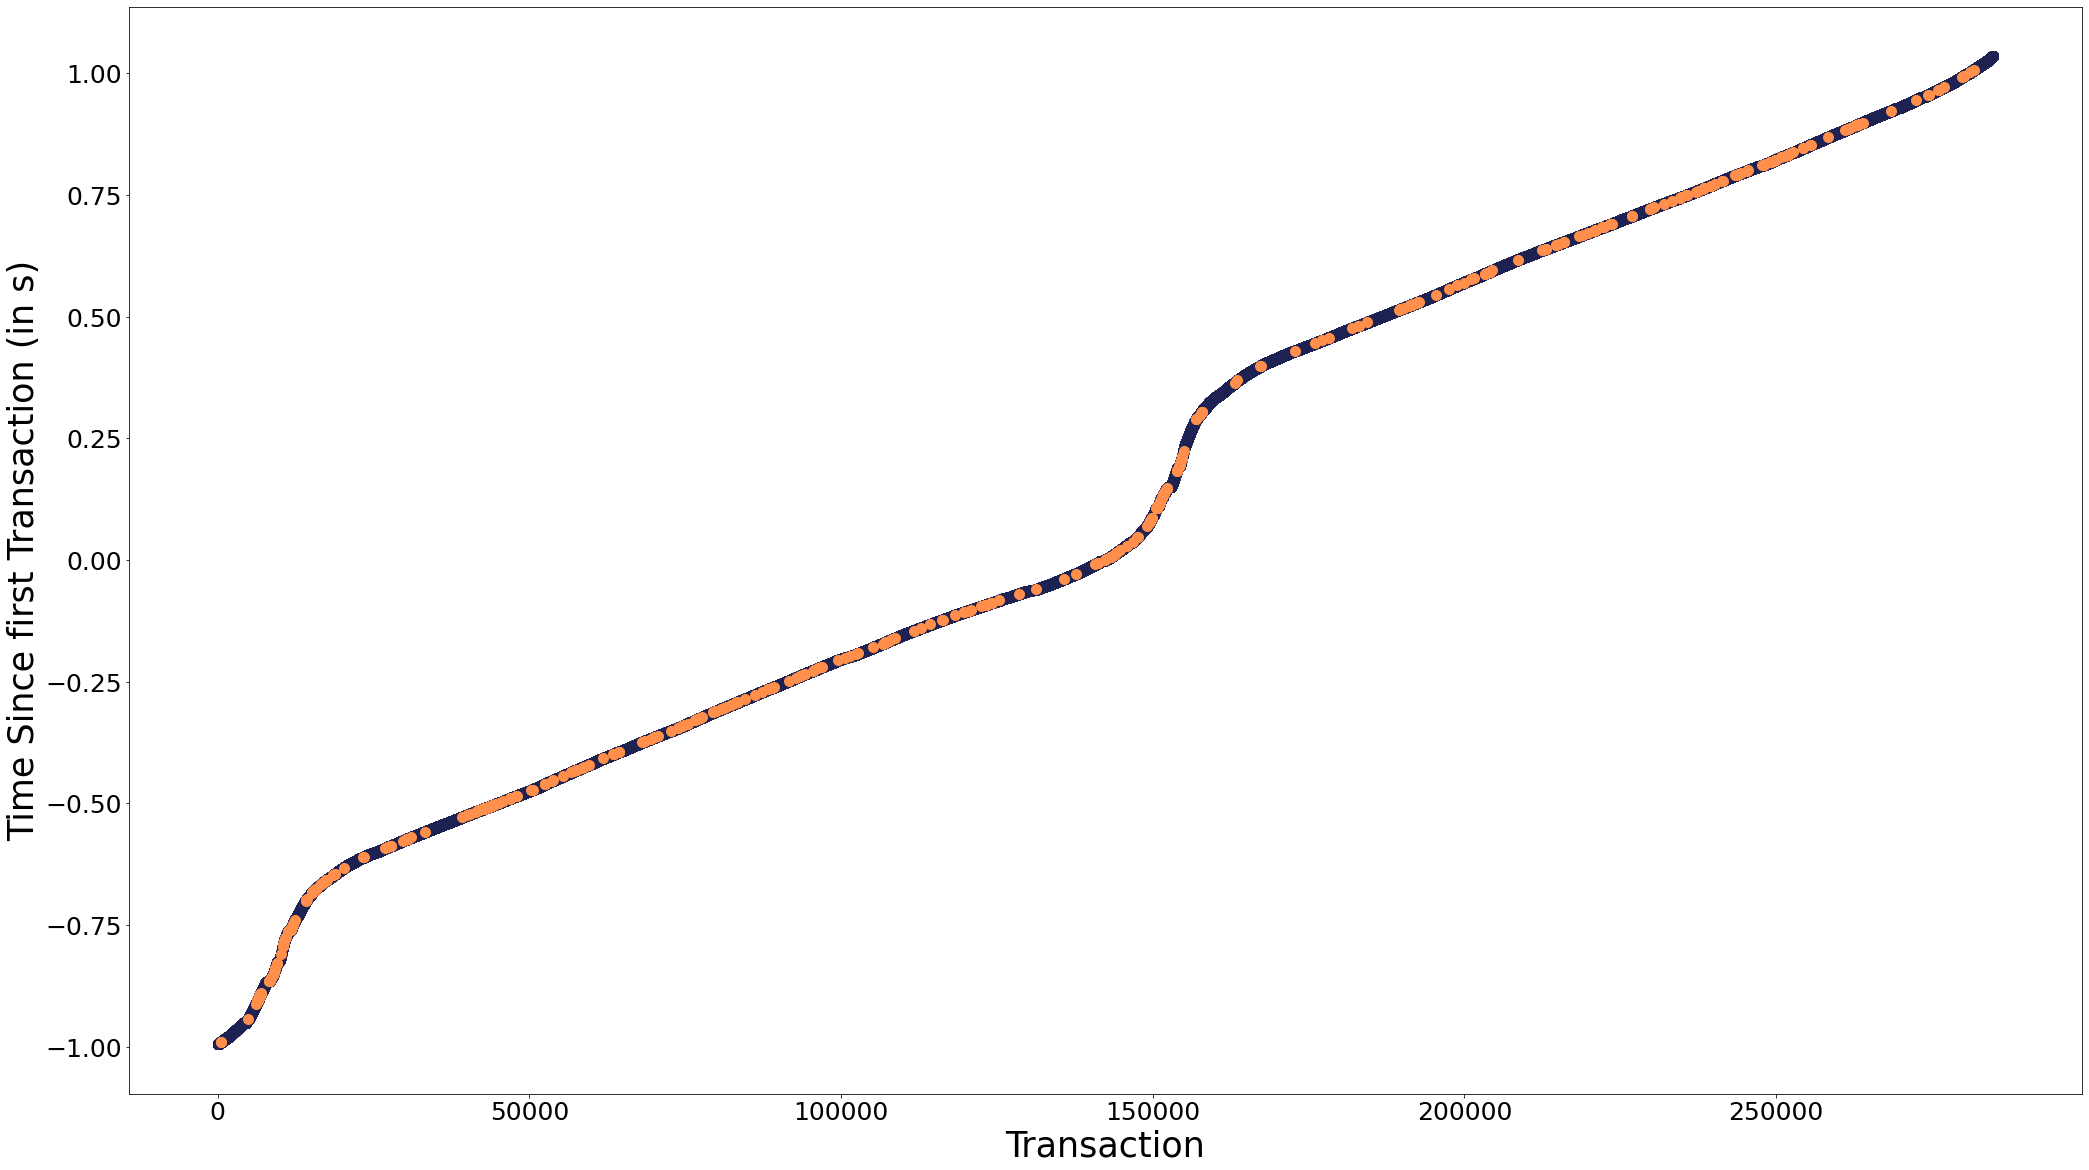

In [31]:
plt.figure(figsize= (35,20))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel('Time Since first Transaction (in s)', fontsize=35)
plt.xlabel('Transaction', fontsize=35)

plt.scatter(pos.index, pos['scaled_time'], s= 100, zorder=2, color= '#ff8f4a')
plt.scatter(neg.index, neg['scaled_time'], s=100, zorder=1, color = '#1e2252')
# fig.update_layout(xaxis_title='Transaction Amount (in €)',yaxis_title='Transactions')
plt.show()

# Classification

Classification is one of the methods to predict the class of these transactions. We chose Random Forest as the algorithm to build our model with because it performed best in the Cross-Validation phase of the project.

### Random Forest 

In [108]:
# Train the model on training data
%time
model = RandomForestClassifier(n_estimators=80, 
                               verbose=2, 
                               n_jobs=2, 
                               oob_score= True, 
                               class_weight = "balanced").fit(rebalanced_features, rebalanced_labels)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 80building tree 2 of 80

building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   26.7s


building tree 40 of 80
building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed:   59.0s finished


In [109]:
# Use the forest's predict method on the test data
predictions = model.predict(test_features)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed:    0.4s finished


In [110]:
# Performance metrics for Random Forest
metrics_random_forest = [['Accuracy',(accuracy_score(test_labels, predictions))],
                         ['Precision',precision_score(test_labels, predictions)],
                         ['Recall', recall_score(test_labels, predictions)],
                         ['F1_score',f1_score(test_labels, predictions)]]
metric_values_random_forest = pd.DataFrame(metrics_random_forest, columns = ['Metrics', 'Results'])
metric_values_random_forest

,Metrics,Results
0,Accuracy,0.999451
1,Precision,0.869863
2,Recall,0.788820
3,F1_score,0.827362


[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Fraud')]

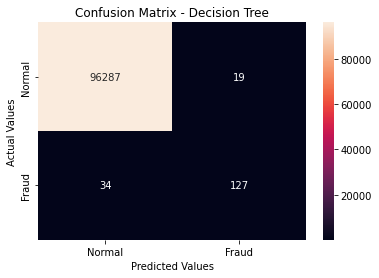

In [111]:
# Confusion Matrix
confusion_matrix_decision_tree = confusion_matrix(test_labels, predictions)
# Visualization
ax = plt.subplot()
sn.heatmap(confusion_matrix_decision_tree, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Normal','Fraud'])
ax.yaxis.set_ticklabels(['Normal','Fraud'])

In [119]:
import pickle
filename = '/Users/mac/Desktop/card_fraud_rf.pkl'
pickle.dump(model, open(filename, 'wb'))

# Anomaly Detection

In [15]:
#Calculate the contamination factor
ad_fraud = data[data['Class']==1]
ad_normal = data[data['Class']==0]
outlier_fraction = len(ad_fraud)/float(len(ad_normal))

In [78]:
# Labels are the values we want to predict
ad_labels = np.array(data['Class'])
# Remove the labels from the features
# axis 1 refers to the columns
ad_features= data.drop('Class', axis = 1)
# Saving feature names for later use
ad_feature_list = list(ad_features.columns)
# Convert to numpy array
ad_features = np.array(ad_features)

## Isolation Forest

In [77]:
#Model Creation
isof = IsolationForest(n_estimators=80, 
                       max_samples=len(train_features), 
                       contamination=float(0.02),
                       random_state=42, 
                       verbose=2)

In [78]:
#Fitting the model 
isof.fit(train_features)
label_pred = isof.predict(test_features)
scores_pred = isof.decision_function(test_features)

#Calculating the number of errors
label_pred[label_pred == 1] = 0
label_pred[label_pred == -1] = 1
errors = (label_pred != test_labels).sum()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 80 for this parallel run (total 80)...
Building estimator 2 of 80 for this parallel run (total 80)...
Building estimator 3 of 80 for this parallel run (total 80)...
Building estimator 4 of 80 for this parallel run (total 80)...
Building estimator 5 of 80 for this parallel run (total 80)...
Building estimator 6 of 80 for this parallel run (total 80)...
Building estimator 7 of 80 for this parallel run (total 80)...
Building estimator 8 of 80 for this parallel run (total 80)...
Building estimator 9 of 80 for this parallel run (total 80)...
Building estimator 10 of 80 for this parallel run (total 80)...
Building estimator 11 of 80 for this parallel run (total 80)...
Building estimator 12 of 80 for this parallel run (total 80)...
Building estimator 13 of 80 for this parallel run (total 80)...
Building estimator 14 of 80 for this parallel run (total 80)...
Building estimator 15 of 80 for this parallel run (total 80)...
Building estimator 16 of 80 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s finished


In [79]:
counter = Counter(label_pred)
print("Prediction Distribution:", counter)
print("Errors: ", errors)
print("Accuracy Score: ")
print(accuracy_score(test_labels,label_pred))
print("Classification Report: ")
print(classification_report(test_labels, label_pred))

Prediction Distribution: Counter({0: 94472, 1: 1995})
Errors:  1902
Accuracy Score: 
0.9802834129806047
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     96306
           1       0.06      0.79      0.12       161

    accuracy                           0.98     96467
   macro avg       0.53      0.88      0.55     96467
weighted avg       1.00      0.98      0.99     96467



[Text(0, 0.5, 'Genuine'), Text(0, 1.5, 'Fraud')]

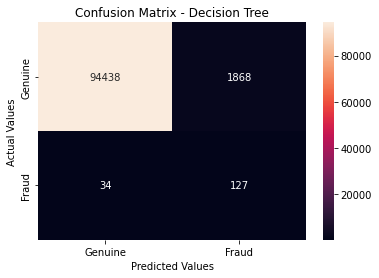

In [80]:
# Confusion Matrix
confusion_matrix_decision_tree = confusion_matrix(test_labels, label_pred)
# Visualization
ax = plt.subplot()
sn.heatmap(confusion_matrix_decision_tree, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])

## Local Outlier Factor

In [85]:
#Creating the model
lof = LocalOutlierFactor(n_neighbors=40, algorithm='auto', 
                         leaf_size=30, metric='minkowski',p=2, 
                         metric_params=None, contamination=float(0.05), novelty=True)

In [86]:
#Fitting the model over the data
lof.fit(train_features)
label_pred = lof.predict(test_features)

#Calculating the number of errors
label_pred[label_pred == 1] = 0
label_pred[label_pred == -1] = 1
errors = (label_pred != test_labels).sum()

In [87]:
print("Errors: ", errors)
print("Accuracy Score: ")
print(accuracy_score(test_labels,label_pred))
print("Classification Report: ")
print(classification_report(test_labels,label_pred))

Errors:  4982
Accuracy Score: 
0.9483553961458323
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     96306
           1       0.00      0.13      0.01       161

    accuracy                           0.95     96467
   macro avg       0.50      0.54      0.49     96467
weighted avg       1.00      0.95      0.97     96467



[Text(0, 0.5, 'Genuine'), Text(0, 1.5, 'Fraud')]

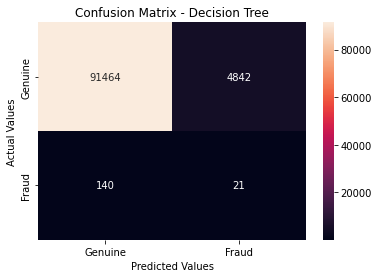

In [88]:
# Confusion Matrix
confusion_matrix_decision_tree = confusion_matrix(test_labels, label_pred)
# Visualization
ax = plt.subplot()
sn.heatmap(confusion_matrix_decision_tree, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])

## One Class SVM 

In [89]:
#Create the One Class SVM model
svm = OneClassSVM(kernel='rbf', degree=2, gamma='auto',nu=0.1, max_iter=-1)

In [90]:
svm.fit(train_features)
label_pred = svm.predict(test_features)

In [91]:
label_pred[label_pred == 1] = 0
label_pred[label_pred == -1] = 1
errors = (label_pred != test_labels).sum()

print("Errors: ", errors)
print("Accuracy Score: ")
print(accuracy_score(test_labels,label_pred))
print("Classification Report: ")
print(classification_report(test_labels,label_pred))

Errors:  9631
Accuracy Score: 
0.9001627499559435
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     96306
           1       0.01      0.88      0.03       161

    accuracy                           0.90     96467
   macro avg       0.51      0.89      0.49     96467
weighted avg       1.00      0.90      0.95     96467



[Text(0, 0.5, 'Genuine'), Text(0, 1.5, 'Fraud')]

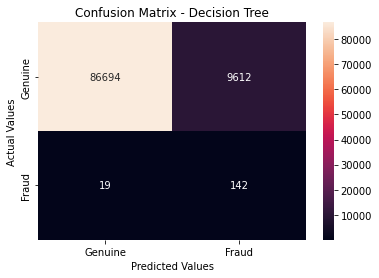

In [92]:
# Confusion Matrix
confusion_matrix_decision_tree = confusion_matrix(test_labels, label_pred)
# Visualization
ax = plt.subplot()
sn.heatmap(confusion_matrix_decision_tree, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])

## K Means Clustering

In [116]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(train_features)

In [117]:
label_pred = kmeans.predict(test_features)

label_pred[label_pred == 1] = 0
label_pred[label_pred == -1] = 1
errors = (label_pred != test_labels).sum()

print("Errors: ", errors)
print("Accuracy Score: ")
print(accuracy_score(test_labels,label_pred))
print("Classification Report: ")
print(classification_report(test_labels,label_pred))

Errors:  161
Accuracy Score: 
0.9983310354836369
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96306
           1       0.00      0.00      0.00       161

    accuracy                           1.00     96467
   macro avg       0.50      0.50      0.50     96467
weighted avg       1.00      1.00      1.00     96467



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Fraud')]

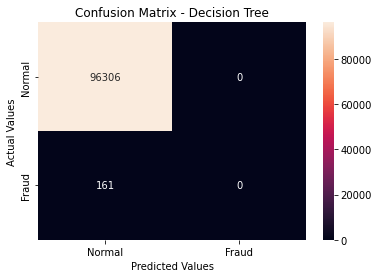

In [118]:
# Confusion Matrix
confusion_matrix_decision_tree = confusion_matrix(test_labels, label_pred)
# Visualization
ax = plt.subplot()
sn.heatmap(confusion_matrix_decision_tree, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Normal','Fraud'])
ax.yaxis.set_ticklabels(['Normal','Fraud'])